In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "C:/Users/baseb/OneDrive/Desktop/module 5 challenge/Mouse_metadata.csv"
study_results_path = "C:/Users/baseb/OneDrive/Desktop/module 5 challenge/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_mouse_study = pd.merge(mouse_metadata, study_results)

combined_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45,0
1,k403,Ramicane,Male,21,16,5,39,0
2,k403,Ramicane,Male,21,16,10,35,1
3,k403,Ramicane,Male,21,16,15,34,1
4,k403,Ramicane,Male,21,16,20,33,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63,2
1889,z969,Naftisol,Male,9,30,30,66,3
1890,z969,Naftisol,Male,9,30,35,69,4
1891,z969,Naftisol,Male,9,30,40,70,4


In [4]:
unique_mice = combined_mouse_study["Mouse ID"].unique()
number_of_mice = unique_mice.__len__()
number_of_mice

249

In [5]:
mask = combined_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates = combined_mouse_study.loc[mask, 'Mouse ID'].unique()

print("Duplicate Mouse IDs: ", duplicates)

Duplicate Mouse IDs:  ['g989']


In [6]:
duplicates

array(['g989'], dtype=object)

In [7]:
clean_mouse_study = combined_mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45,0
1,k403,Ramicane,Male,21,16,5,39,0
2,k403,Ramicane,Male,21,16,10,35,1
3,k403,Ramicane,Male,21,16,15,34,1
4,k403,Ramicane,Male,21,16,20,33,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63,2
1889,z969,Naftisol,Male,9,30,30,66,3
1890,z969,Naftisol,Male,9,30,35,69,4
1891,z969,Naftisol,Male,9,30,40,70,4


In [8]:
num_unique_mice = clean_mouse_study['Mouse ID'].nunique()

print("Number of unique mice in the clean dataset: ", num_unique_mice)

Number of unique mice in the clean dataset:  249


In [10]:
drug_regimen_summary = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

drug_regimen_summary = drug_regimen_summary.rename(columns={'mean': 'Mean Tumor Volume',
                                                            'median': 'Median Tumor Volume',
                                                            'var': 'Tumor Volume Variance',
                                                            'std': 'Tumor Volume Std. Dev.',
                                                            'sem': 'Tumor Volume Std. Err.'})

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.682609,42.0,25.431574,5.042973,0.332524
Ceftamin,52.595506,52.0,39.089697,6.252175,0.468620
Infubinol,52.876404,52.0,43.397067,6.587645,0.493765
Ketapril,55.250000,54.0,68.060160,8.249858,0.601683
Naftisol,54.322581,52.5,66.489974,8.154138,0.597890
Placebo,54.060773,52.0,61.068508,7.814634,0.580857
Propriva,52.442308,51.0,42.932134,6.552262,0.524601
Ramicane,40.236842,41.0,23.600046,4.857988,0.321728
Stelasyn,54.226519,52.0,60.042848,7.748732,0.575959


Text(0, 0.5, 'Number of Mice Tested')

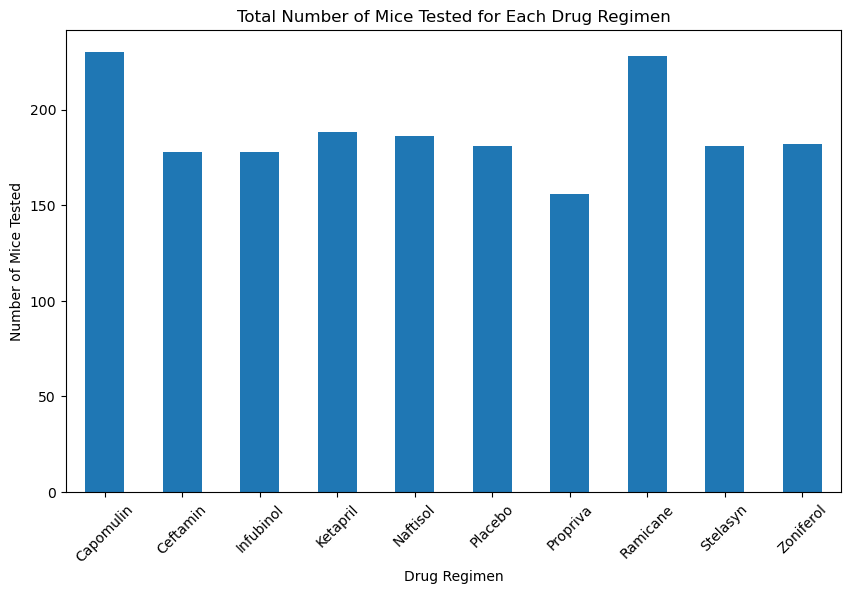

In [11]:
timepoint_counts = clean_mouse_study.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].count()

regimen_timepoint_counts = timepoint_counts.groupby('Drug Regimen').sum()

ax = regimen_timepoint_counts.plot(kind='bar', figsize=(10, 6), rot=45)

ax.set_title('Total Number of Mice Tested for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

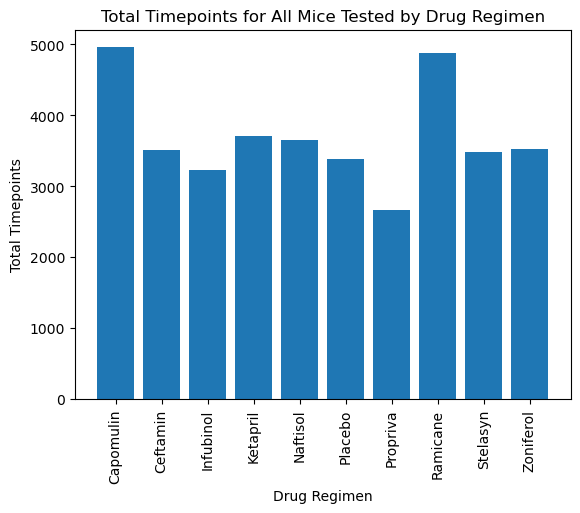

In [12]:
regimen_timepoint_counts = clean_mouse_study.groupby('Drug Regimen')['Timepoint'].sum()

plt.bar(regimen_timepoint_counts.index, regimen_timepoint_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints for All Mice Tested by Drug Regimen')
plt.xticks(rotation=90)

plt.show()

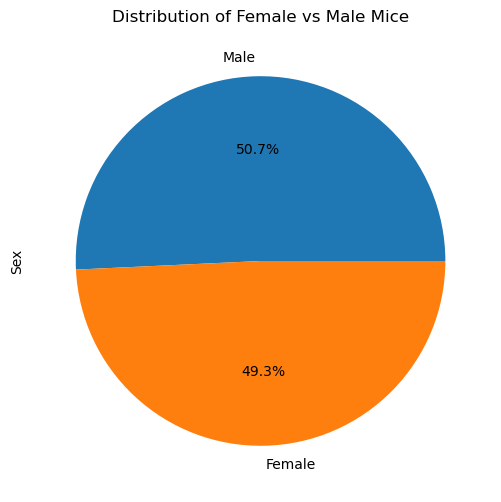

In [13]:
sex_counts = clean_mouse_study["Sex"].value_counts()

sex_counts.plot(kind="pie", figsize=(6, 6), autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

plt.show()

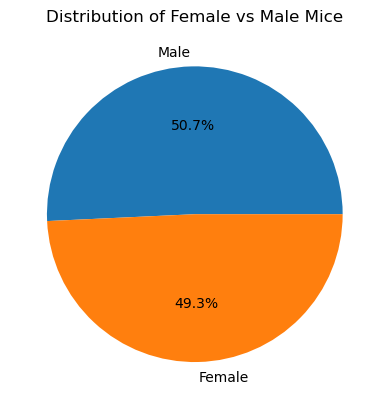

In [14]:
sex_counts = clean_mouse_study["Sex"].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

plt.show()

In [15]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

max_timepoints = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()


merged_df = pd.merge(max_timepoints, clean_mouse_study, on=["Mouse ID", "Timepoint"])

final_tumor_volumes = merged_df.loc[merged_df["Drug Regimen"].isin(treatments), ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_tumor_volumes.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,68
1,a251,Infubinol,66
3,a275,Ceftamin,63
6,a411,Ramicane,38
7,a444,Ramicane,43


In [16]:
tumor_vols = []

for treatment in treatments:
    treatment_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vols.append(treatment_df)
    
    # Determine outliers
    quartiles = treatment_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    
    # Print results
    print(f"{treatment}:")
    print(f"Interquartile range: {iqr:.2f}")
    print(f"Median: {quartiles[0.5]:.2f}")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    print(f"Number of outliers: {len(outliers)}\n")
 

Capomulin:
Interquartile range: 7.00
Median: 42.00
Values below 27.50 could be outliers.
Values above 55.50 could be outliers.
Number of outliers: 2

Ramicane:
Interquartile range: 8.00
Median: 41.00
Values below 25.00 could be outliers.
Values above 57.00 could be outliers.
Number of outliers: 2

Infubinol:
Interquartile range: 10.00
Median: 52.00
Values below 32.00 could be outliers.
Values above 72.00 could be outliers.
Number of outliers: 0

Ceftamin:
Interquartile range: 10.00
Median: 52.00
Values below 32.00 could be outliers.
Values above 72.00 could be outliers.
Number of outliers: 0



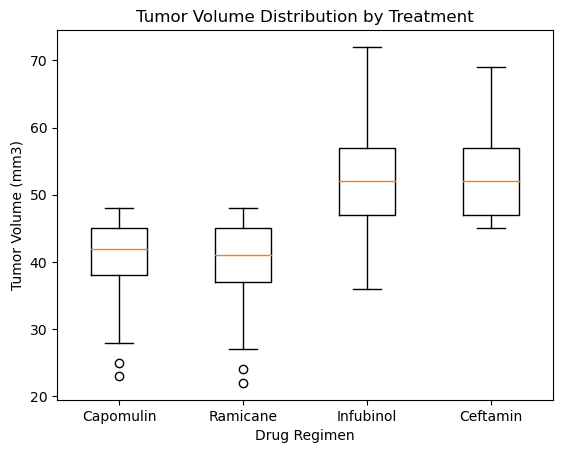

In [17]:
tumor_vols = []

for treatment in treatments:
    treatment_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vols.append(treatment_df)
    
fig, ax = plt.subplots()

ax.boxplot(tumor_vols)

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments)


plt.show()

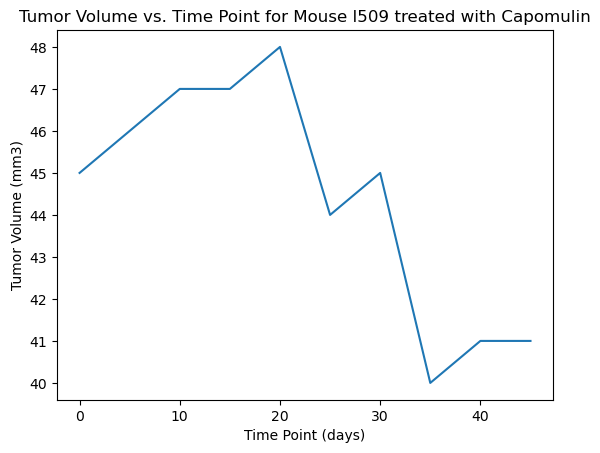

In [18]:
mouse_id = 'l509'

mouse_data = clean_mouse_study.loc[(clean_mouse_study['Mouse ID'] == mouse_id) & (clean_mouse_study['Drug Regimen'] == 'Capomulin')]

x_axis = mouse_data['Timepoint']
y_axis = mouse_data['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)

plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

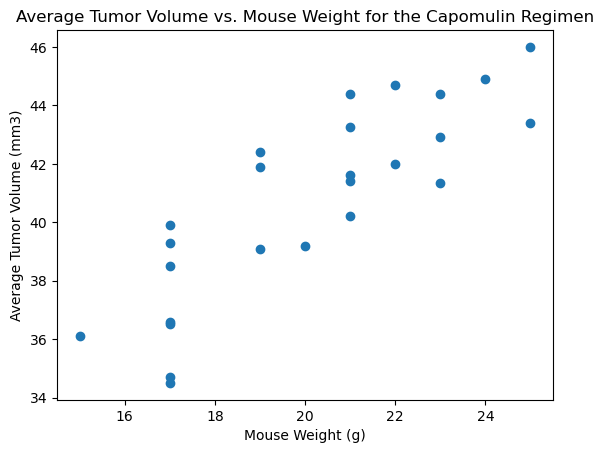

In [22]:
capomulin_data = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
                                                       

x_axis = grouped_data['Weight (g)']
y_axis = grouped_data['Tumor Volume (mm3)'] 
                                                       
plt.scatter(x_axis, y_axis)
                                                       
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

                                                       
plt.show()                                         

y = 1.33x + 16.25
R^2 = 0.35


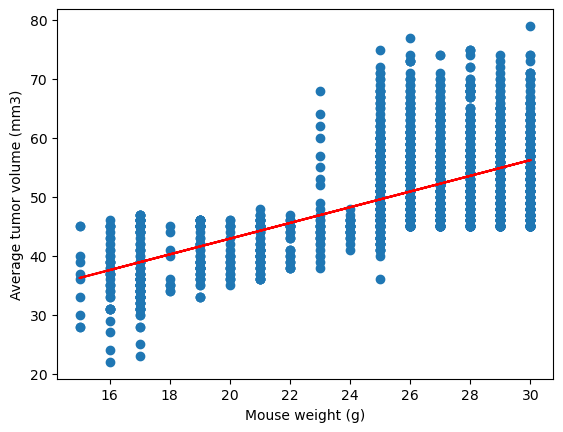

In [23]:
slope, intercept, r_value, p_value, std_err = st.linregress(clean_mouse_study['Weight (g)'], clean_mouse_study['Tumor Volume (mm3)'])

plt.scatter(clean_mouse_study['Weight (g)'], clean_mouse_study['Tumor Volume (mm3)'])
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average tumor volume (mm3)')


x = clean_mouse_study['Weight (g)']
y = slope * x + intercept
plt.plot(x, y, color='red')


equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'
print(equation)
print(r_squared)

plt.show()